### **Examen de Certificación – Intento 2**

**Fundamentos de Data Science**

**Analizando la Satisfacción de Clientes en la Industria Hotelera**

**Requisitos:**

Tu tarea es limpiar y explorar un dataset que contiene información sobre la satisfacción de los clientes en la industria hotelera. Este análisis es crucial para los ejecutivos de la empresa que buscan entender mejor las opiniones y experiencias de sus clientes para mejorar los servicios ofrecidos.

**El dataset puede ser encontrado aquí.**

**Limpieza de datos con Python:**

**Detección y eliminación de valores duplicados:** Asegúrate de que cada registro en el dataset sea único.

**Verificación y ajuste de tipos de datos:** Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

**Consistencia en valores categóricos:** Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘yes’, ‘Yes’, ‘YES’).

**Manejo de valores faltantes:** Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.

**Detección de datos anómalos:** Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, una estancia de 1000 noches).

**Exploración de datos con Python:**

**Visualizaciones exploratorias univariadas:** Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

**Visualizaciones exploratorias multivariadas:** Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

**Análisis adicional:**

**Estadísticas descriptivas:** Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.

**Identificación de tendencias:** Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

**Entrega:**

Un archivo **.ipynb** claramente comentado con todo el código utilizado para la limpieza y exploración de datos.

Para cumplir con los requisitos anteriores, este archivo tendrá un mínimo de 4 visualizaciones.

Subir un repositorio a una plataforma de control de versiones (por ejemplo, **GitHub**) con un **TAG** incluido para verificar la fecha de entrega. El repositorio debe contener el archivo .ipynb.

NOTA: Debes enviar un archivo y un enlace al repositorio con el TAG correspondiente. Las presentaciones de enlaces sin el archivo o sin el TAG serán consideradas no presentadas.
Notas:

Para evitar que otros estudiantes copien tu trabajo, asegúrate de que el código no esté guardado en un repositorio público.
Para minimizar la deducción de puntos, asegúrate de cargar los requisitos completos.
Si tienes problemas para cargar archivos en la aplicación de exámenes, por favor NO desbloquees otro examen. Envía el archivo por correo electrónico a tu instructor.

Puedes usar cualquier recurso que tengas disponible (notas de clase, Google, Stackoverflow, etc.) – PERO DEBES CITAR CUALQUIER FUENTE UTILIZADA. Puedes citar fuentes en forma de comentario de código o una celda de texto con enlaces a cualquier recurso que hayas utilizado. La falta de citas será considerada plagio y resultará en la falla del examen.

No puedes recibir ayuda de ninguna otra persona en este código. Esto incluye compañeros de clase, exalumnos, tu instructor, etc. La colaboración con otra persona en este examen será considerada plagio y resultará en la falla del examen y puede resultar en la expulsión del programa.

Se permite el uso de LLM (Copilot, GPT, etc.), pero solo como guía o para depuración. Se espera que los estudiantes pongan su máximo esfuerzo.

**Importar librerias**

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import json
import re

**Leer archivo csv y cargar en un dataframe**

In [2]:
path = '../data/kaggle/hotel_bookings.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## **Limpieza de datos**

**Dumplicados**

In [3]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.head()

Número de registros duplicados: 31994


hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

**Elimiar duplicados**

In [4]:
# Eliminar duplicados en el mismo DataFrame
df.drop_duplicates(inplace=True)

In [5]:
# ver cuantas filas tiene el df
num_filas = df.shape[0]  # Número de filas

print(f"El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El DataFrame tiene 87396 filas y 32 columnas.


**Verificar duplicados**

In [6]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.head()

Número de registros duplicados: 0


hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

**Verificar tipos de datos y ajustar los que requieran conversion**

In [7]:
# Definir el diccionario de tipos de datos (excluyendo las fechas)
diccionario = {
    'hotel': 'string',
    'arrival_date_month': 'string',
    'meal': 'string',
    'country': 'string',
    'market_segment': 'string',
    'distribution_channel': 'string',
    'reserved_room_type': 'string',
    'assigned_room_type': 'string',
    'deposit_type': 'string',
    'customer_type': 'string',
    'reservation_status': 'string'
}

# Función para mapear tipos personalizados a tipos de pandas
def map_tipo(tipo_personalizado):
    mapping = {
        'string': 'string',
        'float64': 'float64',
        'date': 'datetime64[ns]'
    }
    return mapping.get(tipo_personalizado, 'object')  # 'object' como valor por defecto

# Crear un nuevo diccionario mapeado para pandas
diccionario_mapeado = {col: map_tipo(tipo) for col, tipo in diccionario.items()}

print("Diccionario Mapeado para pandas:")
print(diccionario_mapeado)

Diccionario Mapeado para pandas:
{'hotel': 'string', 'arrival_date_month': 'string', 'meal': 'string', 'country': 'string', 'market_segment': 'string', 'distribution_channel': 'string', 'reserved_room_type': 'string', 'assigned_room_type': 'string', 'deposit_type': 'string', 'customer_type': 'string', 'reservation_status': 'string'}


In [8]:
def validar_tipos(df, diccionario):
    """
    Valida que cada columna en df tenga el tipo de dato especificado en diccionario.
    
    Parámetros:
    - df: DataFrame de pandas.
    - diccionario: Diccionario con columnas como llaves y tipos de datos como valores.
    
    Retorna:
    - mismatches: Lista de tuplas con (columna, tipo_actual, tipo_esperado) para discrepancias.
    """
    mismatches = []
    for columna, tipo_esperado in diccionario.items():
        if columna in df.columns:
            tipo_actual = str(df[columna].dtype)
            # Algunos dtypes pueden ser equivalentes pero diferentes en nombre
            # Por ejemplo, 'string' en pandas puede ser 'string[python]'
            # Comparar solo las partes relevantes
            if tipo_esperado.startswith('datetime') and tipo_actual.startswith('datetime'):
                continue  # Considerar igual si ambos son datetime
            elif tipo_actual != tipo_esperado:
                mismatches.append((columna, tipo_actual, tipo_esperado))
        else:
            mismatches.append((columna, 'No existe en el DataFrame', tipo_esperado))
    return mismatches

# Ejecutar la validación
mismatches = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados
if not mismatches:
    print("Todos los tipos de datos son correctos.")
else:
    print("Discrepancias encontradas en los tipos de datos:")
    for columna, actual, esperado in mismatches:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")

Discrepancias encontradas en los tipos de datos:
- Columna 'hotel': Tipo actual -> object, Tipo esperado -> string
- Columna 'arrival_date_month': Tipo actual -> object, Tipo esperado -> string
- Columna 'meal': Tipo actual -> object, Tipo esperado -> string
- Columna 'country': Tipo actual -> object, Tipo esperado -> string
- Columna 'market_segment': Tipo actual -> object, Tipo esperado -> string
- Columna 'distribution_channel': Tipo actual -> object, Tipo esperado -> string
- Columna 'reserved_room_type': Tipo actual -> object, Tipo esperado -> string
- Columna 'assigned_room_type': Tipo actual -> object, Tipo esperado -> string
- Columna 'deposit_type': Tipo actual -> object, Tipo esperado -> string
- Columna 'customer_type': Tipo actual -> object, Tipo esperado -> string
- Columna 'reservation_status': Tipo actual -> object, Tipo esperado -> string


In [9]:
def corregir_tipos(df, diccionario):
    """
    Corrige los tipos de datos de las columnas en df según lo especificado en diccionario.
    
    Parámetros:
    - df: DataFrame de pandas.
    - diccionario: Diccionario con columnas como llaves y tipos de datos como valores.
    
    Retorna:
    - df: DataFrame con tipos de datos corregidos.
    """
    for columna, tipo in diccionario.items():
        if columna in df.columns:
            try:
                if tipo == 'datetime64[ns]':
                    df[columna] = pd.to_datetime(df[columna], errors='coerce')
                else:
                    df[columna] = df[columna].astype(tipo)
            except Exception as e:
                print(f"Error al convertir la columna '{columna}' a '{tipo}': {e}")
    return df

# Corregir los tipos de datos
df = corregir_tipos(df, diccionario_mapeado)

# Volver a validar
mismatches_post = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados después de la corrección
if not mismatches_post:
    print("Todos los tipos de datos han sido corregidos correctamente.")
else:
    print("Aún existen discrepancias después de la corrección:")
    for columna, actual, esperado in mismatches_post:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")

Todos los tipos de datos han sido corregidos correctamente.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  string 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  string 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

**Convertir object a date**

In [11]:
# Convertir la columna 'reservation_status_date' a datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

# Verificar los tipos de datos
print(df.dtypes)

hotel                             string[python]
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                string[python]
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                              string[python]
country                           string[python]
market_segment                    string[python]
distribution_channel              string[python]
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                string[python]
assigned_room_type  

## **Consistencia en valores categóricos**

In [12]:
# Lista de columnas categóricas a revisar
categorical_cols = [ 'is_canceled', 'arrival_date_month', 'meal', 'country', 
    'market_segment', 'distribution_channel', 'reserved_room_type', 
    'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status',
    'is_repeated_guest']
# Diccionario para almacenar los valores únicos
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()  # Eliminar NaN y convertir a lista
    valores_unicos[col] = unique_vals
    print(f"\nValores únicos en la columna '{col}':")
    print(unique_vals)

# Ruta donde se guardará el archivo JSON
ruta_json = '../data/kaggle/valores_unicos_iniciales_hotel.json'
# Guardar el diccionario en un archivo JSON
with open(ruta_json, 'w', encoding='utf-8') as f:
    json.dump(valores_unicos, f, ensure_ascii=False, indent=4)
    print(f"\nValores únicos guardados en '{ruta_json}'")


Valores únicos en la columna 'is_canceled':
[0, 1]

Valores únicos en la columna 'arrival_date_month':
['July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June']

Valores únicos en la columna 'meal':
['BB', 'FB', 'HB', 'SC', 'Undefined']

Valores únicos en la columna 'country':
['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS', 'ARM', 'JPN', 'LKA'

In [13]:
def limpiar_cadena(cadena):
    """
    Limpia una cadena de texto realizando las siguientes operaciones:
    1. Convierte todo el texto a minúsculas.
    2. Elimina caracteres no imprimibles antes de la primera letra y después de la última letra,
       pero mantiene los caracteres internos.
    
    Parámetros:
    - cadena (str): La cadena de texto a limpiar.
    
    Retorna:
    - str: La cadena limpia.
    """
    if isinstance(cadena, str):
        # 1. Convertir todo a minúsculas
        cadena = cadena.lower()
        
        # 2. Eliminar caracteres no imprimibles antes de la primera letra y después de la última letra
        # Buscar la posición de la primera letra (a-z)
        primer_letra = re.search(r'[a-z]', cadena)
        # Buscar la posición de la última letra (a-z)
        ultima_letra = re.search(r'[a-z](?!.*[a-z])', cadena)
        
        if primer_letra and ultima_letra:
            inicio = primer_letra.start()
            fin = ultima_letra.end()
            cadena = cadena[inicio:fin]
        else:
            # Si no se encuentran letras, eliminar espacios en blanco
            cadena = cadena.strip()
        
        return cadena
    return cadena


# Aplicar la limpieza a las columnas categóricas
for col in categorical_cols:
    df[col] = df[col].apply(limpiar_cadena)
# Verificar los cambios
for col in categorical_cols:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(df[col].unique())


Valores únicos después de limpieza en 'is_canceled':
[0 1]

Valores únicos después de limpieza en 'arrival_date_month':
['july' 'august' 'september' 'october' 'november' 'december' 'january'
 'february' 'march' 'april' 'may' 'june']

Valores únicos después de limpieza en 'meal':
['bb' 'fb' 'hb' 'sc' 'undefined']

Valores únicos después de limpieza en 'country':
['prt' 'gbr' 'usa' 'esp' 'irl' 'fra' <NA> 'rou' 'nor' 'omn' 'arg' 'pol'
 'deu' 'bel' 'che' 'cn' 'grc' 'ita' 'nld' 'dnk' 'rus' 'swe' 'aus' 'est'
 'cze' 'bra' 'fin' 'moz' 'bwa' 'lux' 'svn' 'alb' 'ind' 'chn' 'mex' 'mar'
 'ukr' 'smr' 'lva' 'pri' 'srb' 'chl' 'aut' 'blr' 'ltu' 'tur' 'zaf' 'ago'
 'isr' 'cym' 'zmb' 'cpv' 'zwe' 'dza' 'kor' 'cri' 'hun' 'are' 'tun' 'jam'
 'hrv' 'hkg' 'irn' 'geo' 'and' 'gib' 'ury' 'jey' 'caf' 'cyp' 'col' 'ggy'
 'kwt' 'nga' 'mdv' 'ven' 'svk' 'fji' 'kaz' 'pak' 'idn' 'lbn' 'phl' 'sen'
 'syc' 'aze' 'bhr' 'nzl' 'tha' 'dom' 'mkd' 'mys' 'arm' 'jpn' 'lka' 'cub'
 'cmr' 'bih' 'mus' 'com' 'sur' 'uga' 'bgr' 'civ' 'jor

In [14]:
# Guardar los valores únicos en un archivo JSON para referencia
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()
    valores_unicos[col] = unique_vals
# Guardar en 'valores_unicos.json'
with open('../data/kaggle/valores_unicos_finales_hoteles.json', 'w', encoding='utf-8') as f:
    json.dump(valores_unicos, f, ensure_ascii=False, indent=4)
    print("Valores únicos guardados en 'valores_unicos.json'.")

Valores únicos guardados en 'valores_unicos.json'.


**Manejo de datos faltantes**

In [15]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

datos sin NAs en q  Na en q  Na en %
company                                       5259    82137    93.98
agent                                        75203    12193    13.95
country                                      86944      452     0.52
hotel                                        87396        0     0.00
previous_cancellations                       87396        0     0.00
reservation_status                           87396        0     0.00
total_of_special_requests                    87396        0     0.00
required_car_parking_spaces                  87396        0     0.00
adr                                          87396        0     0.00
customer_type                                87396        0     0.00
days_in_waiting_list                         87396        0     0.00
deposit_type                                 87396        0     0.00
booking_changes                              87396        0     0.00
assigned_room_type                           87396        0     0.00
reserved_room_type                           87396        0     0.00
previous_bookings_not_canceled               87396        0     0.00
is_repeated_guest                            87396        0     0.00
is_canceled                                  87396        0     0.00
distribution_channel                         87396        0     0.00
market_segment                               87396        0     0.00
meal                                         87396        0     0.00
babies                                       87396        0     0.00
children                                     87392        4     0.00
adults                                       87396        0     0.00
stays_in_week_nights                         87396        0     0.00
stays_in_weekend_nights                      87396        0     0.00
arrival_date_day_of_month                    87396        0     0.00
arrival_date_week_number                     87396        0     0.00
arrival_date_month                           87396        0     0.00
arrival_date_year                            87396        0     0.00
lead_time                                    87396        0     0.00
reservation_status_date                      87396        0     0.00

In [16]:
df.isnull().sum(axis=0)

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


**Rellenar valores**

In [17]:
# Rellenar valores faltantes en columnas categóricas
df['children'] = df['children'].fillna(0)  # Rellenar nulos en 'children' con 0
df['country'] = df['country'].fillna('Desconocido')  # Rellenar nulos en 'country' con 'Desconocido'
df['agent'] = df['agent'].fillna('Sin agente')  # Rellenar nulos en 'agent' con 'Sin agente'
df['company'] = df['company'].fillna('Sin empresa')  # Rellenar nulos en 'company' con 'Sin empresa'

In [18]:
df.isnull().sum(axis=0)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [19]:
#  Definir las columnas categóricas, numéricas y de fecha
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

datos sin NAs en q  Na en q  Na en %
hotel                                        87396        0      0.0
is_canceled                                  87396        0      0.0
reservation_status                           87396        0      0.0
total_of_special_requests                    87396        0      0.0
required_car_parking_spaces                  87396        0      0.0
adr                                          87396        0      0.0
customer_type                                87396        0      0.0
days_in_waiting_list                         87396        0      0.0
company                                      87396        0      0.0
agent                                        87396        0      0.0
deposit_type                                 87396        0      0.0
booking_changes                              87396        0      0.0
assigned_room_type                           87396        0      0.0
reserved_room_type                           87396        0      0.0
previous_bookings_not_canceled               87396        0      0.0
previous_cancellations                       87396        0      0.0
is_repeated_guest                            87396        0      0.0
distribution_channel                         87396        0      0.0
market_segment                               87396        0      0.0
country                                      87396        0      0.0
meal                                         87396        0      0.0
babies                                       87396        0      0.0
children                                     87396        0      0.0
adults                                       87396        0      0.0
stays_in_week_nights                         87396        0      0.0
stays_in_weekend_nights                      87396        0      0.0
arrival_date_day_of_month                    87396        0      0.0
arrival_date_week_number                     87396        0      0.0
arrival_date_month                           87396        0      0.0
arrival_date_year                            87396        0      0.0
lead_time                                    87396        0      0.0
reservation_status_date                      87396        0      0.0

**Deteccion de datos anomalos**

In [20]:
# Calcular estadística descriptiva
print(df['stays_in_week_nights'].describe())

# Calcular IQR
Q1 = df['stays_in_week_nights'].quantile(0.25)
Q3 = df['stays_in_week_nights'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para considerar un dato como anómalo
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar datos anómalos
anomalies = df[(df['stays_in_week_nights'] < lower_bound) | (df['stays_in_week_nights'] > upper_bound)]

print(anomalies)

count    87396.000000
mean         2.625395
std          2.053584
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         50.000000
Name: stays_in_week_nights, dtype: float64
               hotel  is_canceled  lead_time  arrival_date_year  \
30      Resort Hotel            0        118               2015   
31      Resort Hotel            0         95               2015   
52      Resort Hotel            0         76               2015   
85      Resort Hotel            0        324               2015   
86      Resort Hotel            0         69               2015   
...              ...          ...        ...                ...   
117482    City Hotel            0        236               2017   
117821    City Hotel            0        308               2017   
118403    City Hotel            0        115               2017   
118478    City Hotel            0        182               2017   
118570    City Hotel            0        113

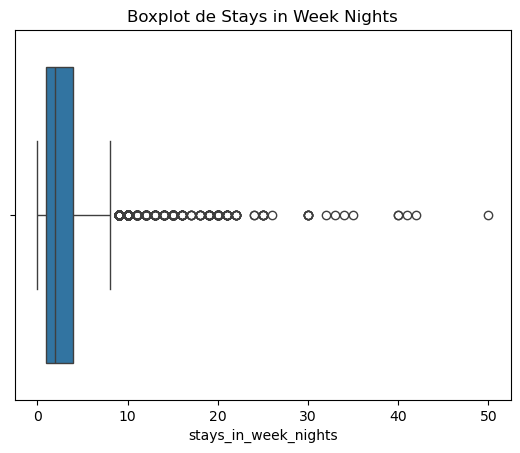

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para detectar outliers
sns.boxplot(x=df['stays_in_week_nights'])
plt.title('Boxplot de Stays in Week Nights')
plt.show()

In [22]:
#  'adults' y 'children'
adults_mean = df['adults'].mean()
adults_std = df['adults'].std()
atypical_adults = df[(df['adults'] > adults_mean + 2 * adults_std) | (df['adults'] < adults_mean - 2 * adults_std)]

In [23]:
print(atypical_adults)


               hotel  is_canceled  lead_time  arrival_date_year  \
125     Resort Hotel            0         32               2015   
354     Resort Hotel            0          0               2015   
1023    Resort Hotel            1         95               2015   
1539    Resort Hotel            1        304               2015   
1587    Resort Hotel            1        333               2015   
...              ...          ...        ...                ...   
117453    City Hotel            0        159               2017   
117921    City Hotel            0         14               2017   
118200    City Hotel            0         10               2017   
118480    City Hotel            0        174               2017   
118911    City Hotel            0        137               2017   

       arrival_date_month  arrival_date_week_number  \
125                  july                        27   
354                  july                        29   
1023               august     

In [24]:
df[['adults','stays_in_week_nights']].describe()

adults  stays_in_week_nights
count  87396.000000          87396.000000
mean       1.875795              2.625395
std        0.626500              2.053584
min        0.000000              0.000000
25%        2.000000              1.000000
50%        2.000000              2.000000
75%        2.000000              4.000000
max       55.000000             50.000000

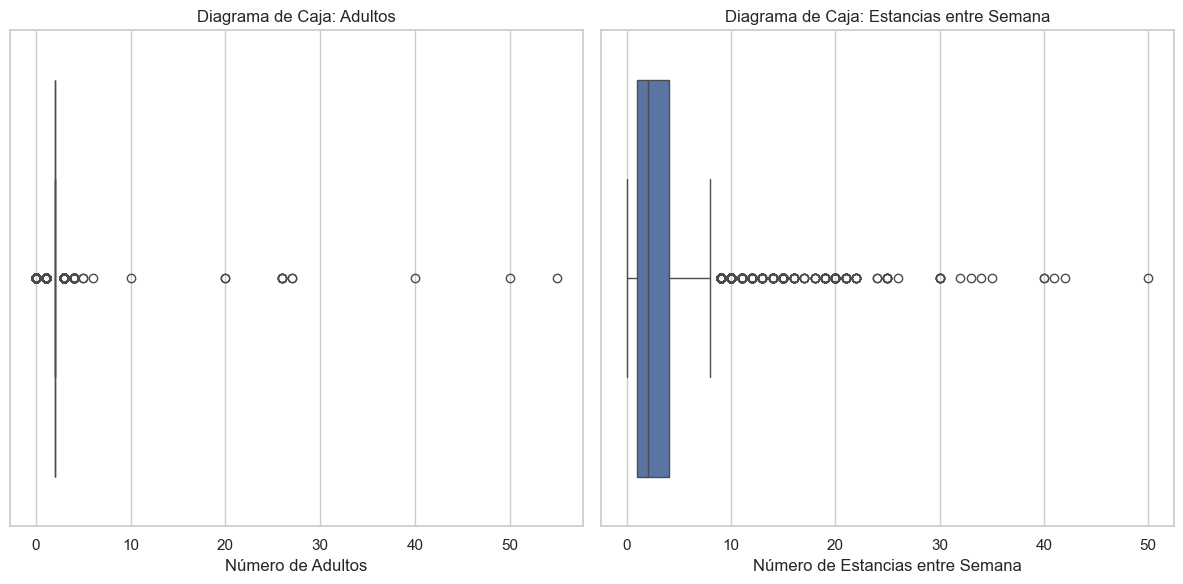

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes tu DataFrame df

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Crear una figura con dos subgráficas
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Diagrama de caja para la columna 'adults'
sns.boxplot(x=df['adults'], ax=axs[0])
axs[0].set_title('Diagrama de Caja: Adultos')
axs[0].set_xlabel('Número de Adultos')

# Diagrama de caja para la columna 'stays_in_week_nights'
sns.boxplot(x=df['stays_in_week_nights'], ax=axs[1])
axs[1].set_title('Diagrama de Caja: Estancias entre Semana')
axs[1].set_xlabel('Número de Estancias entre Semana')

# Ajustar el layout
plt.tight_layout()
plt.show()


In [26]:
# Filtrar donde adultos == 0 o adultos > 5
filt = (df['adults'] == 0) | (df['adults'] > 5)

# Aplicar el filtro
result = df[filt]

# Mostrar el DataFrame filtrado
print(result)

               hotel  is_canceled  lead_time  arrival_date_year  \
1539    Resort Hotel            1        304               2015   
1587    Resort Hotel            1        333               2015   
1643    Resort Hotel            1        336               2015   
1752    Resort Hotel            1        340               2015   
1884    Resort Hotel            1        347               2015   
...              ...          ...        ...                ...   
117204    City Hotel            0        296               2017   
117274    City Hotel            0        276               2017   
117303    City Hotel            0        291               2017   
117453    City Hotel            0        159               2017   
118200    City Hotel            0         10               2017   

       arrival_date_month  arrival_date_week_number  \
1539            september                        36   
1587            september                        36   
1643            september     

**Eliminar datos anomalos**

In [27]:
# Identificar datos anómalos
anomalies = df[(df['stays_in_week_nights'] < lower_bound) | (df['stays_in_week_nights'] > upper_bound)]
import pandas as pd

# Supongamos que ya tienes el DataFrame df, y has calculado la media y desviación estándar
adults_mean = df['adults'].mean()
adults_std = df['adults'].std()

# Identificar datos anómalos
anomalies = df[(df['stays_in_week_nights'] < lower_bound) | (df['stays_in_week_nights'] > upper_bound)]

# Eliminar los datos anómalos del DataFrame original
df.drop(anomalies.index, inplace=True)

# Identificar datos anómalos para adultos
atypical_adults = df[(df['adults'] > adults_mean + 2 * adults_std) | (df['adults'] < adults_mean - 2 * adults_std)]

# Eliminar los datos anómalos para adultos del DataFrame original
df.drop(atypical_adults.index, inplace=True)

# Mostrar el DataFrame limpio
print(df)


               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    july                        27   
1                    july                        27   
2                    july     

In [28]:
#  Definir las columnas categóricas, numéricas y de fecha
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

datos sin NAs en q  Na en q  Na en %
hotel                                        85424        0      0.0
is_canceled                                  85424        0      0.0
reservation_status                           85424        0      0.0
total_of_special_requests                    85424        0      0.0
required_car_parking_spaces                  85424        0      0.0
adr                                          85424        0      0.0
customer_type                                85424        0      0.0
days_in_waiting_list                         85424        0      0.0
company                                      85424        0      0.0
agent                                        85424        0      0.0
deposit_type                                 85424        0      0.0
booking_changes                              85424        0      0.0
assigned_room_type                           85424        0      0.0
reserved_room_type                           85424        0      0.0
previous_bookings_not_canceled               85424        0      0.0
previous_cancellations                       85424        0      0.0
is_repeated_guest                            85424        0      0.0
distribution_channel                         85424        0      0.0
market_segment                               85424        0      0.0
country                                      85424        0      0.0
meal                                         85424        0      0.0
babies                                       85424        0      0.0
children                                     85424        0      0.0
adults                                       85424        0      0.0
stays_in_week_nights                         85424        0      0.0
stays_in_weekend_nights                      85424        0      0.0
arrival_date_day_of_month                    85424        0      0.0
arrival_date_week_number                     85424        0      0.0
arrival_date_month                           85424        0      0.0
arrival_date_year                            85424        0      0.0
lead_time                                    85424        0      0.0
reservation_status_date                      85424        0      0.0

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85424 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           85424 non-null  string        
 1   is_canceled                     85424 non-null  int64         
 2   lead_time                       85424 non-null  int64         
 3   arrival_date_year               85424 non-null  int64         
 4   arrival_date_month              85424 non-null  object        
 5   arrival_date_week_number        85424 non-null  int64         
 6   arrival_date_day_of_month       85424 non-null  int64         
 7   stays_in_weekend_nights         85424 non-null  int64         
 8   stays_in_week_nights            85424 non-null  int64         
 9   adults                          85424 non-null  int64         
 10  children                        85424 non-null  float64       
 11  babies

In [30]:
df.describe()

is_canceled     lead_time  arrival_date_year  \
count  85424.000000  85424.000000       85424.000000   
mean       0.273658     78.637362        2016.211357   
min        0.000000      0.000000        2015.000000   
25%        0.000000     11.000000        2016.000000   
50%        0.000000     48.000000        2016.000000   
75%        1.000000    122.250000        2017.000000   
max        1.000000    737.000000        2017.000000   
std        0.445838     85.202344           0.685686   

       arrival_date_week_number  arrival_date_day_of_month  \
count              85424.000000               85424.000000   
mean                  26.829299                  15.846542   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000000                  24.000000   
max                   53.000000                  31.000000   
std                   13.677342                   8.829622   

       stays_in_weekend_nights  stays_in_week_nights        adults  \
count             85424.000000          85424.000000  85424.000000   
mean                  0.946151              2.472326      1.878570   
min                   0.000000              0.000000      1.000000   
25%                   0.000000              1.000000      2.000000   
50%                   1.000000              2.000000      2.000000   
75%                   2.000000              3.000000      2.000000   
max                   4.000000              8.000000      3.000000   
std                   0.913733              1.639261      0.494369   

           children        babies  is_repeated_guest  previous_cancellations  \
count  85424.000000  85424.000000       85424.000000            85424.000000   
mean       0.134552      0.010910           0.038947                0.030635   
min        0.000000      0.000000           0.000000                0.000000   
25%        0.000000      0.000000           0.000000                0.000000   
50%        0.000000      0.000000           0.000000                0.000000   
75%        0.000000      0.000000           0.000000                0.000000   
max        3.000000     10.000000           1.000000               26.000000   
std        0.445940      0.114188           0.193470                0.372655   

       previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
count                    85424.000000     85424.000000          85424.000000   
mean                         0.187043         0.265780              0.759236   
min                          0.000000         0.000000              0.000000   
25%                          0.000000         0.000000              0.000000   
50%                          0.000000         0.000000              0.000000   
75%                          0.000000         0.000000              0.000000   
max                         72.000000        18.000000            391.000000   
std                          1.750139         0.701374             10.095707   

                adr  required_car_parking_spaces  total_of_special_requests  \
count  85424.000000                 85424.000000               85424.000000   
mean     106.715193                     0.085058                   0.698960   
min       -6.380000                     0.000000                   0.000000   
25%       72.250000                     0.000000                   0.000000   
50%       98.890000                     0.000000                   0.000000   
75%      134.300000                     0.000000                   1.000000   
max     5400.000000                     8.000000                   5.000000   
std       54.888630                     0.282638                   0.831286   

             reservation_status_date  
count                          85424  
mean   2016-08-31 14:31:07.428357376  
min              2014-10-17 00:00:00  
25%

In [31]:
df.isnull().sum(axis=0)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

## **Exploracion de datos con python**

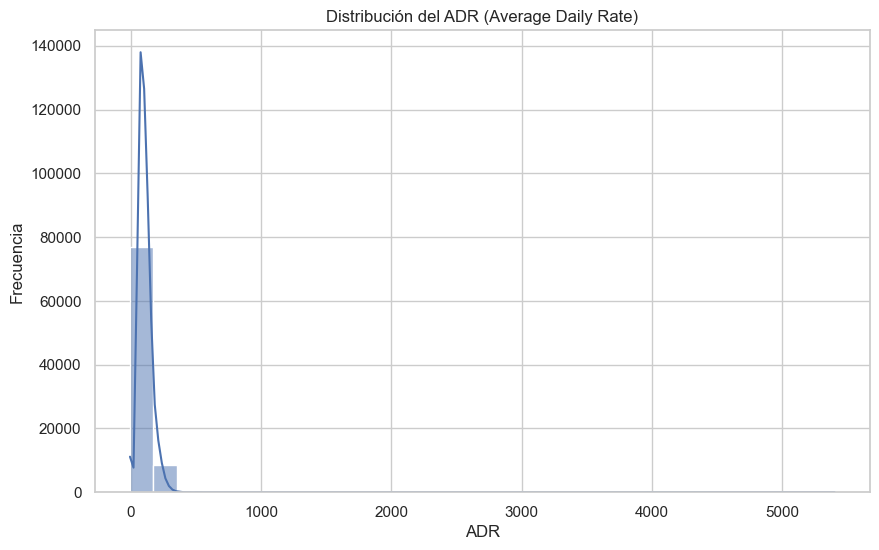

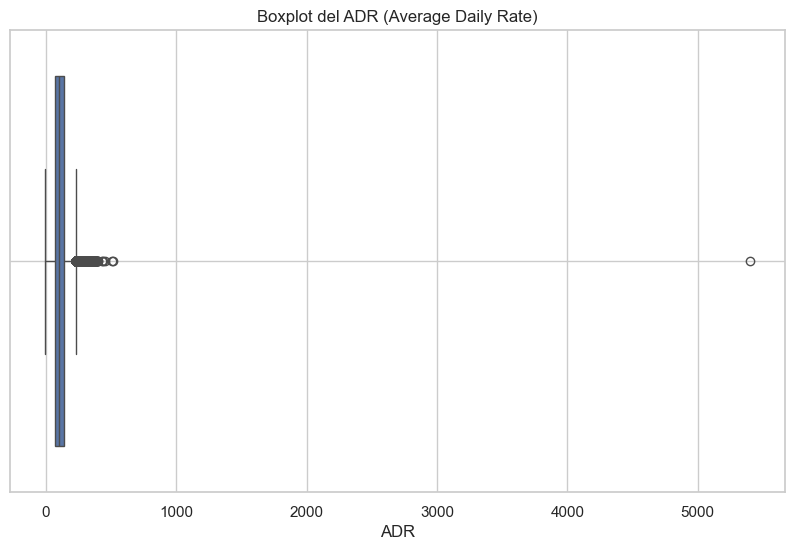

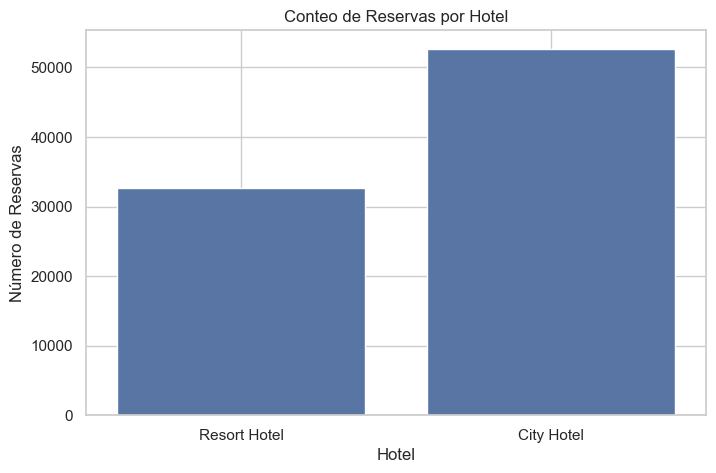

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya tienes tu DataFrame 'df' cargado

# 1. Histograma de 'adr'
plt.figure(figsize=(10, 6))
sns.histplot(df['adr'], bins=30, kde=True)
plt.title('Distribución del ADR (Average Daily Rate)')
plt.xlabel('ADR')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Interpretación:
# El histograma muestra la distribución del ADR. La curva KDE (Kernel Density Estimate)
# indica que la mayoría de los valores de ADR están concentrados entre 0 y 500, 
# con algunos picos notables. Hay algunas colas hacia la derecha que sugieren que hay
# algunos registros con ADR mucho más altos, lo que podría indicar datos anómalos.

# 2. Gráfico de caja para 'adr'
plt.figure(figsize=(10, 6))
sns.boxplot(x='adr', data=df)
plt.title('Boxplot del ADR (Average Daily Rate)')
plt.xlabel('ADR')
plt.grid(True)
plt.show()

# Interpretación:
# El gráfico de caja revela la mediana (línea en el medio de la caja) del ADR,
# así como los cuartiles. Los puntos fuera de los límites de los bigotes son considerados
# como outliers. En este caso, parece que hay varios valores atípicos en el ADR que
# podrían ser objeto de análisis más detallado.

# 3. Conteo de categorías en 'hotel'
plt.figure(figsize=(8, 5))
sns.countplot(x='hotel', data=df)
plt.title('Conteo de Reservas por Hotel')
plt.xlabel('Hotel')
plt.ylabel('Número de Reservas')
plt.grid(True)
plt.show()

# Interpretación:
# Este gráfico de barras muestra el número de reservas por tipo de hotel. 
# Se puede observar que hay una diferencia notable en la cantidad de reservas
# entre los diferentes tipos de hotel, lo que podría indicar la popularidad 
# de ciertos hoteles y es un dato relevante para el análisis de negocio.


**La mayoría de las reservas se realizan con poca anticipación, principalmente dentro de los primeros 100 días. Las reservas con alta anticipación son mucho menos frecuentes, lo que sugiere una tendencia a reservar cerca de la fecha de la estancia.**

C:\Users\user\AppData\Local\Temp\ipykernel_12424\1251278105.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellation_counts.index, y=cancellation_counts.values, palette='viridis')


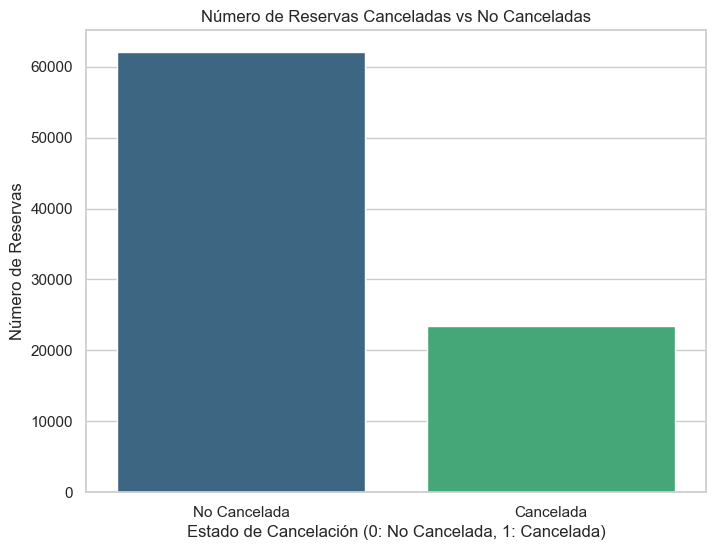

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar las reservas canceladas y no canceladas
cancellation_counts = df['is_canceled'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=cancellation_counts.index, y=cancellation_counts.values, palette='viridis')
plt.title('Número de Reservas Canceladas vs No Canceladas')
plt.xlabel('Estado de Cancelación (0: No Cancelada, 1: Cancelada)')
plt.ylabel('Número de Reservas')
plt.xticks(ticks=[0, 1], labels=['No Cancelada', 'Cancelada'])
plt.show()


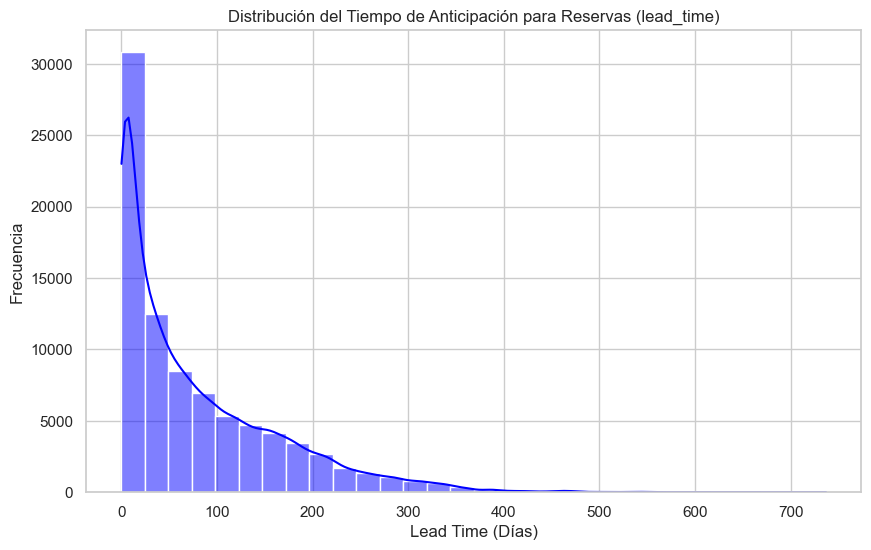

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de la visualización
sns.set(style='whitegrid')

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], bins=30, kde=True, color='blue')

# Añadir título y etiquetas
plt.title('Distribución del Tiempo de Anticipación para Reservas (lead_time)')
plt.xlabel('Lead Time (Días)')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_12424\2859891973.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=arrival_counts.index, y=arrival_counts.values, palette='viridis')


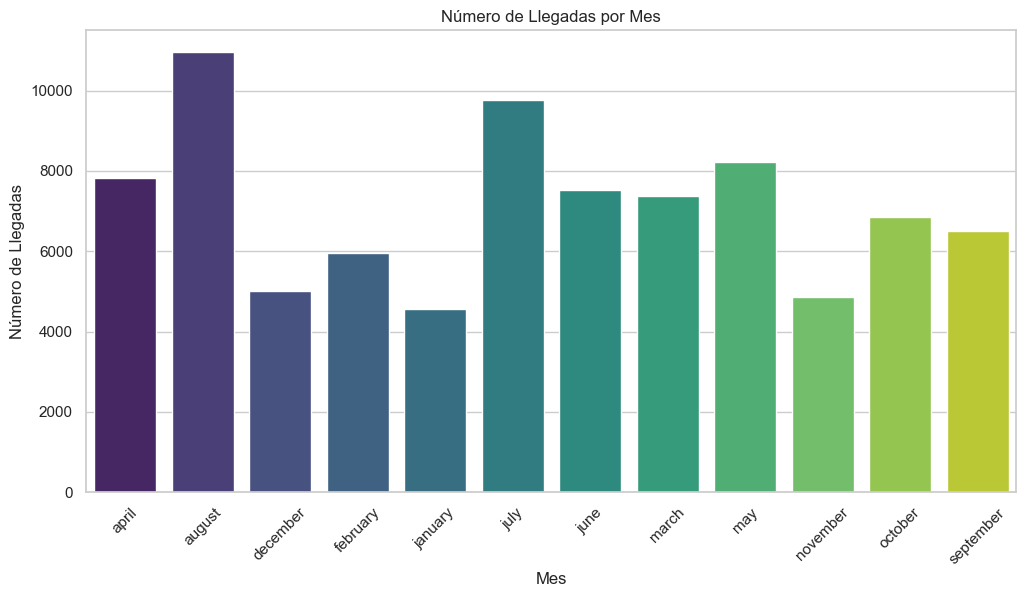

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar el número de llegadas por mes
arrival_counts = df['arrival_date_month'].value_counts().sort_index()

# Configurar el estilo de la visualización
sns.set(style='whitegrid')

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=arrival_counts.index, y=arrival_counts.values, palette='viridis')

# Añadir título y etiquetas
plt.title('Número de Llegadas por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Llegadas')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.show()


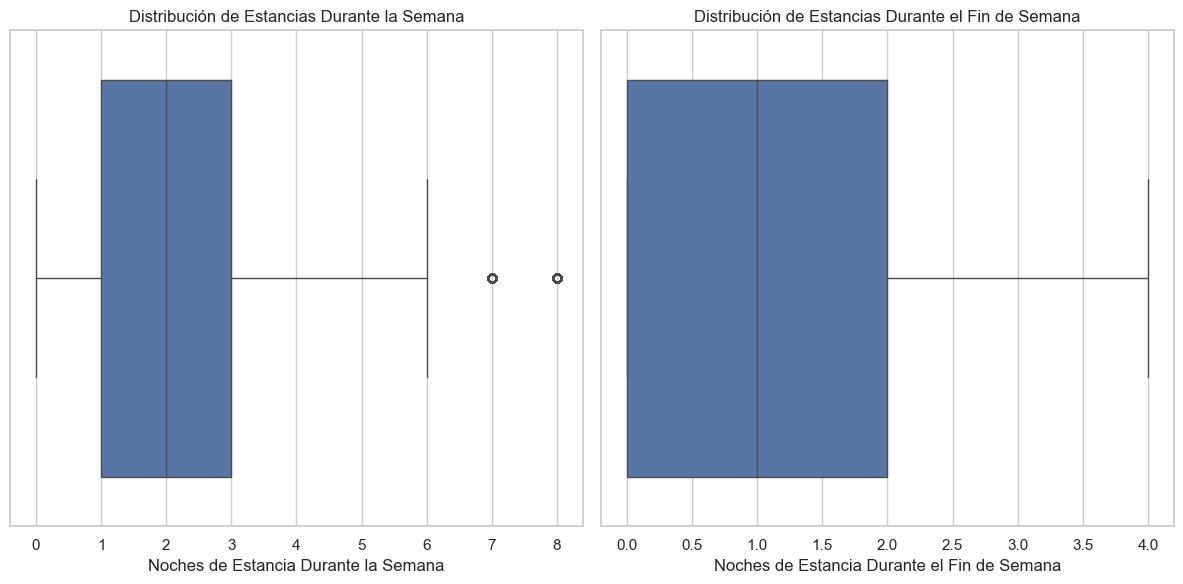

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de la visualización
sns.set(style='whitegrid')

# Crear una figura con subgráficos
plt.figure(figsize=(12, 6))

# Boxplot para stays_in_week_nights
plt.subplot(1, 2, 1)
sns.boxplot(x=df['stays_in_week_nights'])
plt.title('Distribución de Estancias Durante la Semana')
plt.xlabel('Noches de Estancia Durante la Semana')

# Boxplot para stays_in_weekend_nights
plt.subplot(1, 2, 2)
sns.boxplot(x=df['stays_in_weekend_nights'])
plt.title('Distribución de Estancias Durante el Fin de Semana')
plt.xlabel('Noches de Estancia Durante el Fin de Semana')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


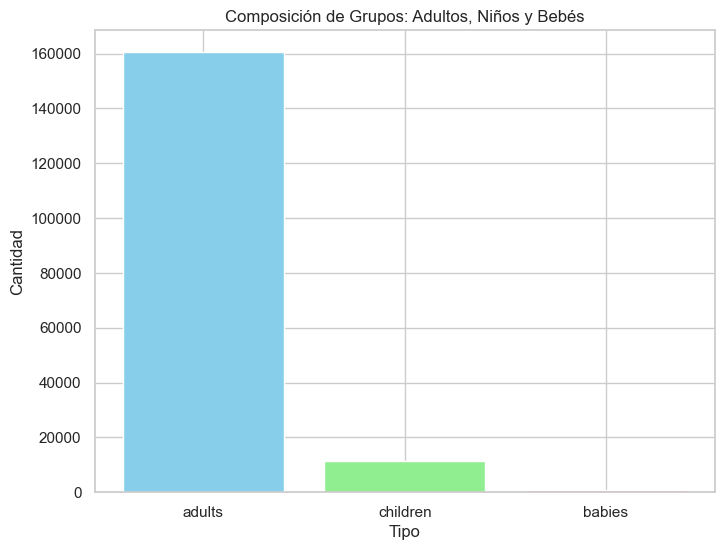

In [37]:
# Crear un nuevo DataFrame para la composición
composition = df[['adults', 'children', 'babies']].sum().reset_index()
composition.columns = ['Tipo', 'Cantidad']

# Crear el gráfico de barras apiladas
plt.figure(figsize=(8, 6))
plt.bar(composition['Tipo'], composition['Cantidad'], color=['skyblue', 'lightgreen', 'salmon'])

# Añadir título y etiquetas
plt.title('Composición de Grupos: Adultos, Niños y Bebés')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()


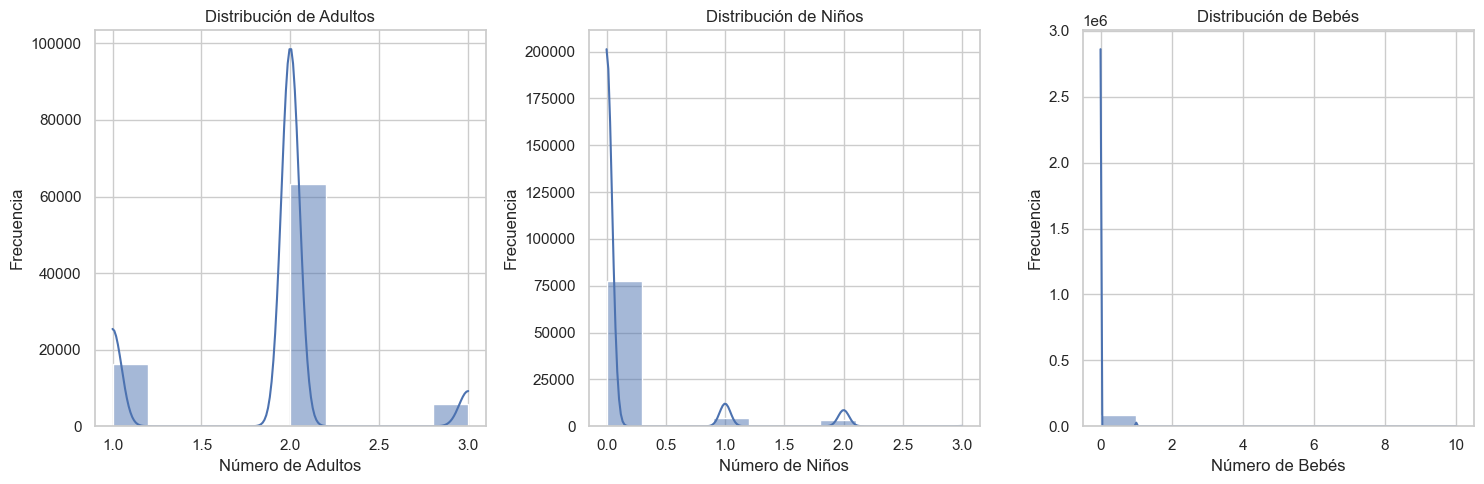

In [38]:
plt.figure(figsize=(15, 5))

# Histograma para adults
plt.subplot(1, 3, 1)
sns.histplot(df['adults'], bins=10, kde=True)
plt.title('Distribución de Adultos')
plt.xlabel('Número de Adultos')
plt.ylabel('Frecuencia')

# Histograma para children
plt.subplot(1, 3, 2)
sns.histplot(df['children'], bins=10, kde=True)
plt.title('Distribución de Niños')
plt.xlabel('Número de Niños')
plt.ylabel('Frecuencia')

# Histograma para babies
plt.subplot(1, 3, 3)
sns.histplot(df['babies'], bins=10, kde=True)
plt.title('Distribución de Bebés')
plt.xlabel('Número de Bebés')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


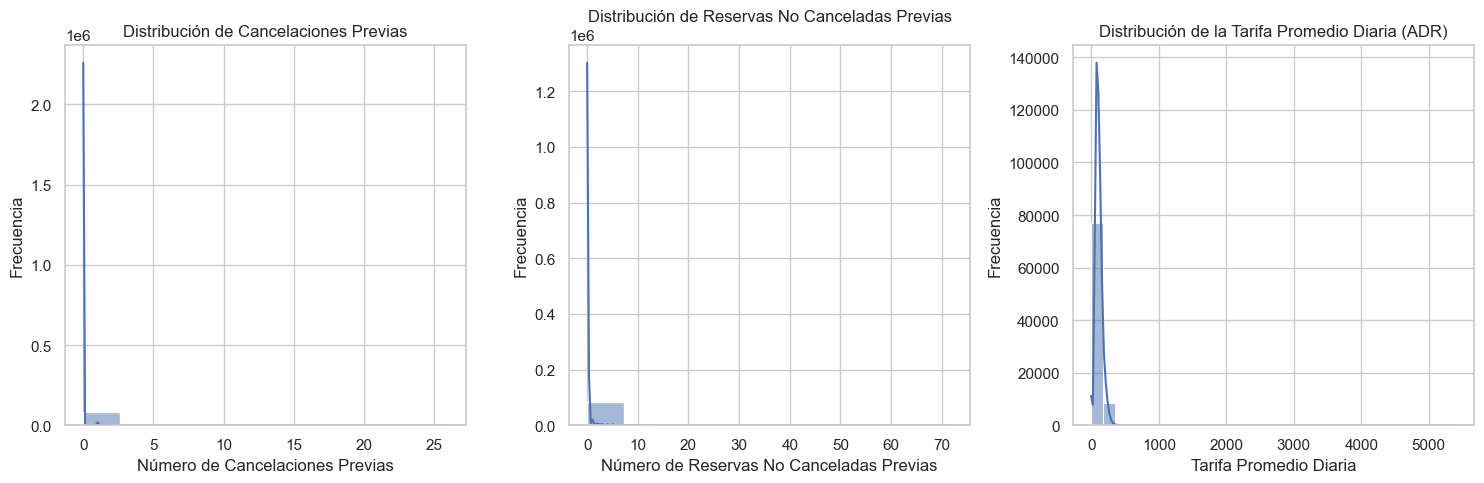

In [39]:
plt.figure(figsize=(15, 5))

# Histograma para previous_cancellations
plt.subplot(1, 3, 1)
sns.histplot(df['previous_cancellations'], bins=10, kde=True)
plt.title('Distribución de Cancelaciones Previas')
plt.xlabel('Número de Cancelaciones Previas')
plt.ylabel('Frecuencia')

# Histograma para previous_bookings_not_canceled
plt.subplot(1, 3, 2)
sns.histplot(df['previous_bookings_not_canceled'], bins=10, kde=True)
plt.title('Distribución de Reservas No Canceladas Previas')
plt.xlabel('Número de Reservas No Canceladas Previas')
plt.ylabel('Frecuencia')

# Histograma para adr
plt.subplot(1, 3, 3)
sns.histplot(df['adr'], bins=30, kde=True)
plt.title('Distribución de la Tarifa Promedio Diaria (ADR)')
plt.xlabel('Tarifa Promedio Diaria')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()



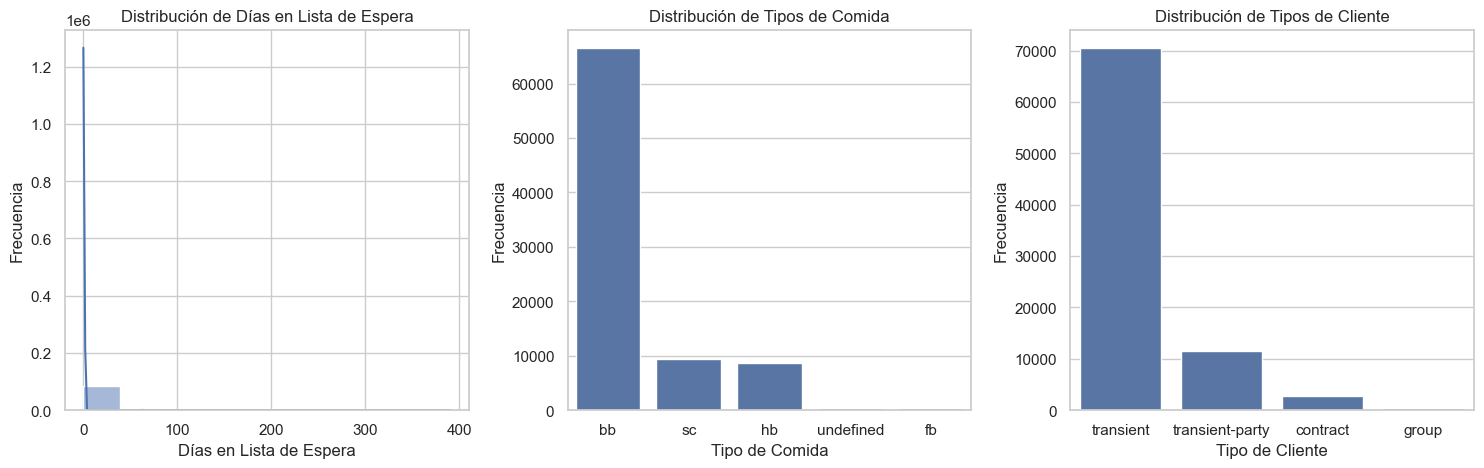

In [40]:
plt.figure(figsize=(15, 5))

# Histograma para days_in_waiting_list
plt.subplot(1, 3, 1)
sns.histplot(df['days_in_waiting_list'], bins=10, kde=True)
plt.title('Distribución de Días en Lista de Espera')
plt.xlabel('Días en Lista de Espera')
plt.ylabel('Frecuencia')

# Histograma para meal (deberías convertirlo a numérico primero si es categórico)
meal_counts = df['meal'].value_counts()
plt.subplot(1, 3, 2)
sns.barplot(x=meal_counts.index, y=meal_counts.values)
plt.title('Distribución de Tipos de Comida')
plt.xlabel('Tipo de Comida')
plt.ylabel('Frecuencia')

# Histograma para customer_type (deberías convertirlo a numérico primero si es categórico)
customer_counts = df['customer_type'].value_counts()
plt.subplot(1, 3, 3)
sns.barplot(x=customer_counts.index, y=customer_counts.values)
plt.title('Distribución de Tipos de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


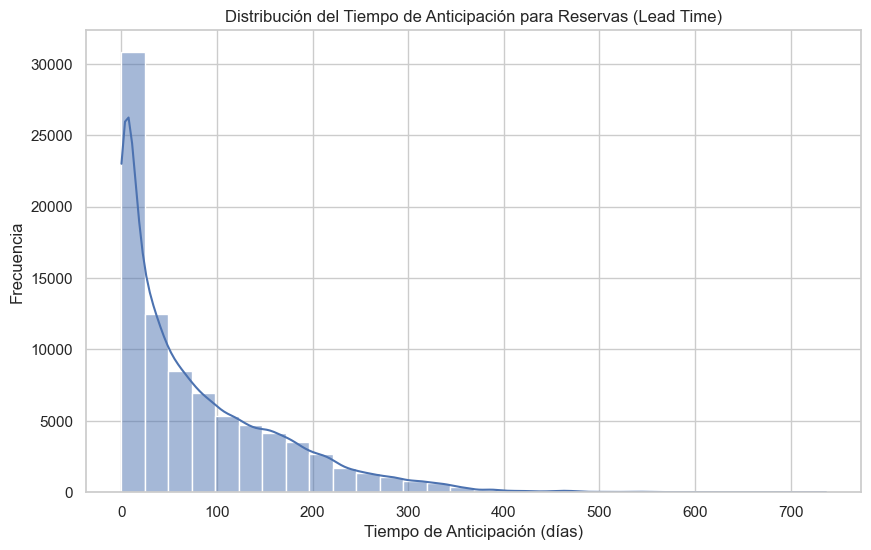

'\nEl histograma muestra cómo se distribuye el tiempo de anticipación de las reservas. \nUna concentración de reservas en un rango de 0 a 30 días sugiere que los huéspedes tienden \na planificar sus estancias con poca antelación. Si se observan picos en tiempos más largos, \npodría indicar promociones o hábitos de viaje específicos. La línea KDE (Kernel Density Estimation) \ntambién ayuda a visualizar la densidad de probabilidad de los datos.\n'

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que df es tu DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], bins=30, kde=True)
plt.title('Distribución del Tiempo de Anticipación para Reservas (Lead Time)')
plt.xlabel('Tiempo de Anticipación (días)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Interpretación
"""
El histograma muestra cómo se distribuye el tiempo de anticipación de las reservas. 
Una concentración de reservas en un rango de 0 a 30 días sugiere que los huéspedes tienden 
a planificar sus estancias con poca antelación. Si se observan picos en tiempos más largos, 
podría indicar promociones o hábitos de viaje específicos. La línea KDE (Kernel Density Estimation) 
también ayuda a visualizar la densidad de probabilidad de los datos.
"""


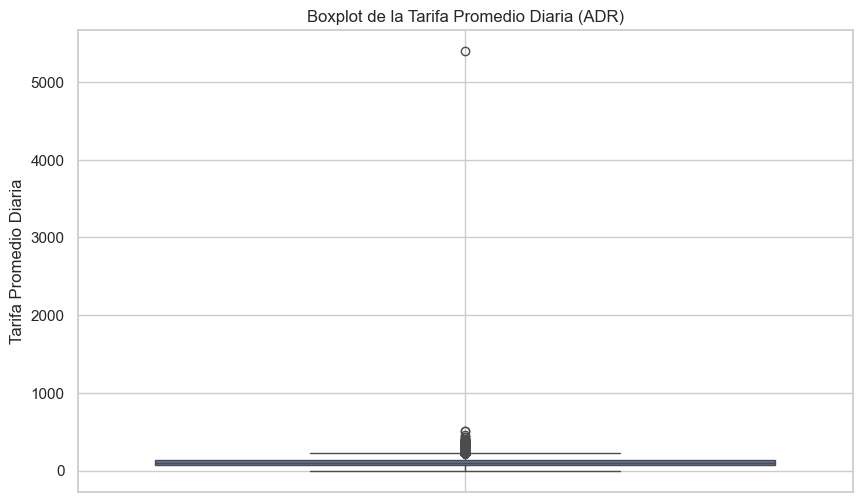

'\nEl boxplot de la tarifa promedio diaria (ADR) permite visualizar la mediana, el rango intercuartílico \ny los valores atípicos. La línea dentro de la caja representa la mediana, mientras que los bordes \nde la caja representan el primer y tercer cuartil. Los puntos fuera de los "bigotes" del boxplot \nson considerados valores atípicos. Esto puede ser útil para identificar precios inusuales que \npodrían requerir una revisión de la política de precios o de la estrategia de mercado.\n'

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['adr'])
plt.title('Boxplot de la Tarifa Promedio Diaria (ADR)')
plt.ylabel('Tarifa Promedio Diaria')
plt.grid(True)
plt.show()

# Interpretación
"""
El boxplot de la tarifa promedio diaria (ADR) permite visualizar la mediana, el rango intercuartílico 
y los valores atípicos. La línea dentro de la caja representa la mediana, mientras que los bordes 
de la caja representan el primer y tercer cuartil. Los puntos fuera de los "bigotes" del boxplot 
son considerados valores atípicos. Esto puede ser útil para identificar precios inusuales que 
podrían requerir una revisión de la política de precios o de la estrategia de mercado.
"""


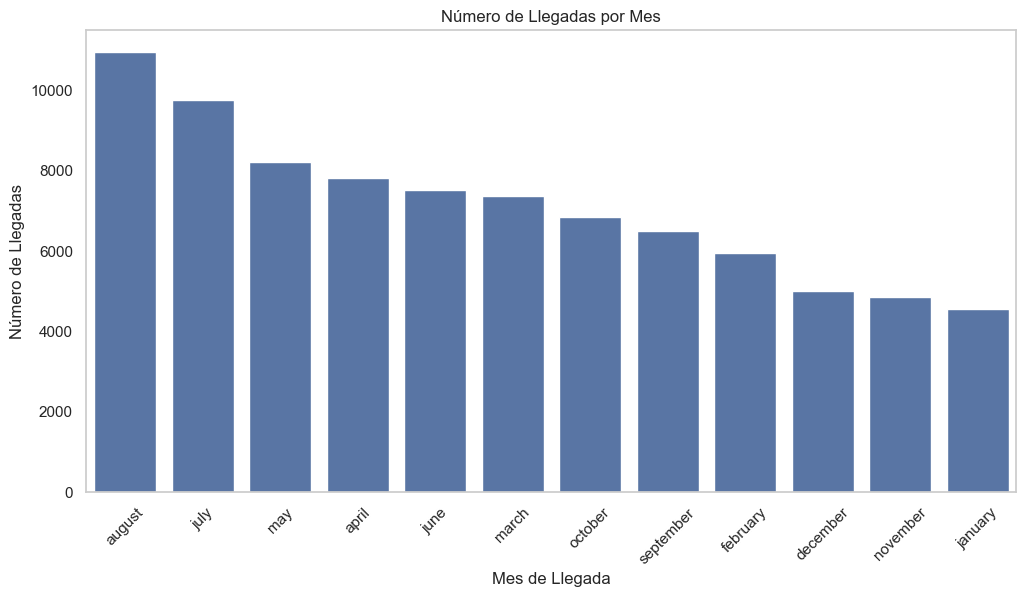

'\nEste gráfico de barras muestra el número de llegadas por mes. Permite identificar \ntendencias estacionales en las reservas, como si hay más llegadas en ciertos meses \ndel año, lo que podría influir en la planificación de marketing y recursos.\n'

In [43]:
# Histograma de barras para arrival_date_month
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='arrival_date_month', order=df['arrival_date_month'].value_counts().index)
plt.title('Número de Llegadas por Mes')
plt.xlabel('Mes de Llegada')
plt.ylabel('Número de Llegadas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Interpretación
"""
Este gráfico de barras muestra el número de llegadas por mes. Permite identificar 
tendencias estacionales en las reservas, como si hay más llegadas en ciertos meses 
del año, lo que podría influir en la planificación de marketing y recursos.
"""


### Visualizaciones exploratorias multivariadas

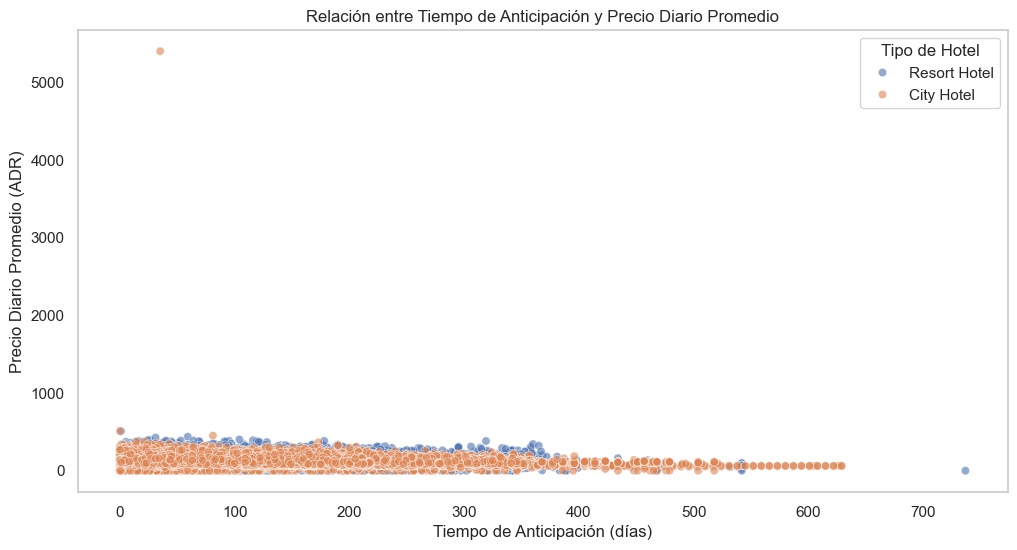

"\nEste gráfico de dispersión muestra la relación entre el tiempo de anticipación \npara las reservas y el precio diario promedio (ADR). \nPodemos observar cómo el tiempo de anticipación afecta los precios, \ny si hay diferencias significativas entre los tipos de hotel. \nPor ejemplo, se podría notar que las reservas de tipo 'City Hotel' tienden \na tener un precio diario promedio más alto con un mayor tiempo de anticipación.\n"

In [44]:
# Gráfico de dispersión entre lead_time y adr
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='lead_time', y='adr', hue='hotel', alpha=0.6)
plt.title('Relación entre Tiempo de Anticipación y Precio Diario Promedio')
plt.xlabel('Tiempo de Anticipación (días)')
plt.ylabel('Precio Diario Promedio (ADR)')
plt.legend(title='Tipo de Hotel')
plt.grid()
plt.show()

# Interpretación
"""
Este gráfico de dispersión muestra la relación entre el tiempo de anticipación 
para las reservas y el precio diario promedio (ADR). 
Podemos observar cómo el tiempo de anticipación afecta los precios, 
y si hay diferencias significativas entre los tipos de hotel. 
Por ejemplo, se podría notar que las reservas de tipo 'City Hotel' tienden 
a tener un precio diario promedio más alto con un mayor tiempo de anticipación.
"""


C:\Users\user\AppData\Local\Temp\ipykernel_12424\2069219792.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




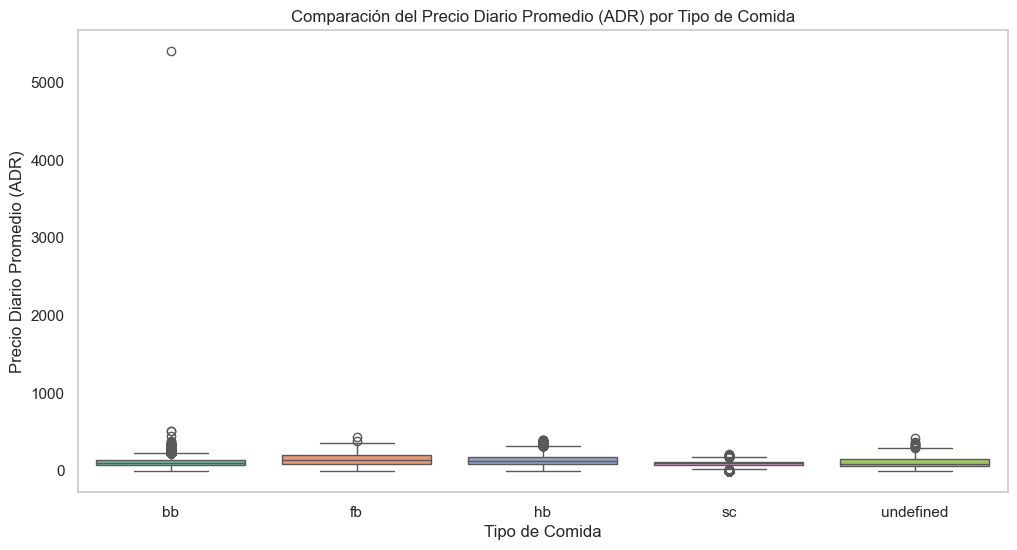

'\nEste gráfico de cajas muestra la distribución del precio diario promedio (ADR) \nsegún el tipo de comida. \n'

In [59]:
# Gráfico de cajas para comparar adr según el tipo de comida
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='meal', y='adr', palette='Set2')
plt.title('Comparación del Precio Diario Promedio (ADR) por Tipo de Comida')
plt.xlabel('Tipo de Comida')
plt.ylabel('Precio Diario Promedio (ADR)')
plt.grid(axis='y')
plt.show()

# Interpretación
"""
Este gráfico de cajas muestra la distribución del precio diario promedio (ADR) 
según el tipo de comida. 
"""


C:\Users\user\AppData\Local\Temp\ipykernel_12424\2689357190.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='arrival_date_year', y='booking_changes', data=booking_changes_by_year, palette='Set2')


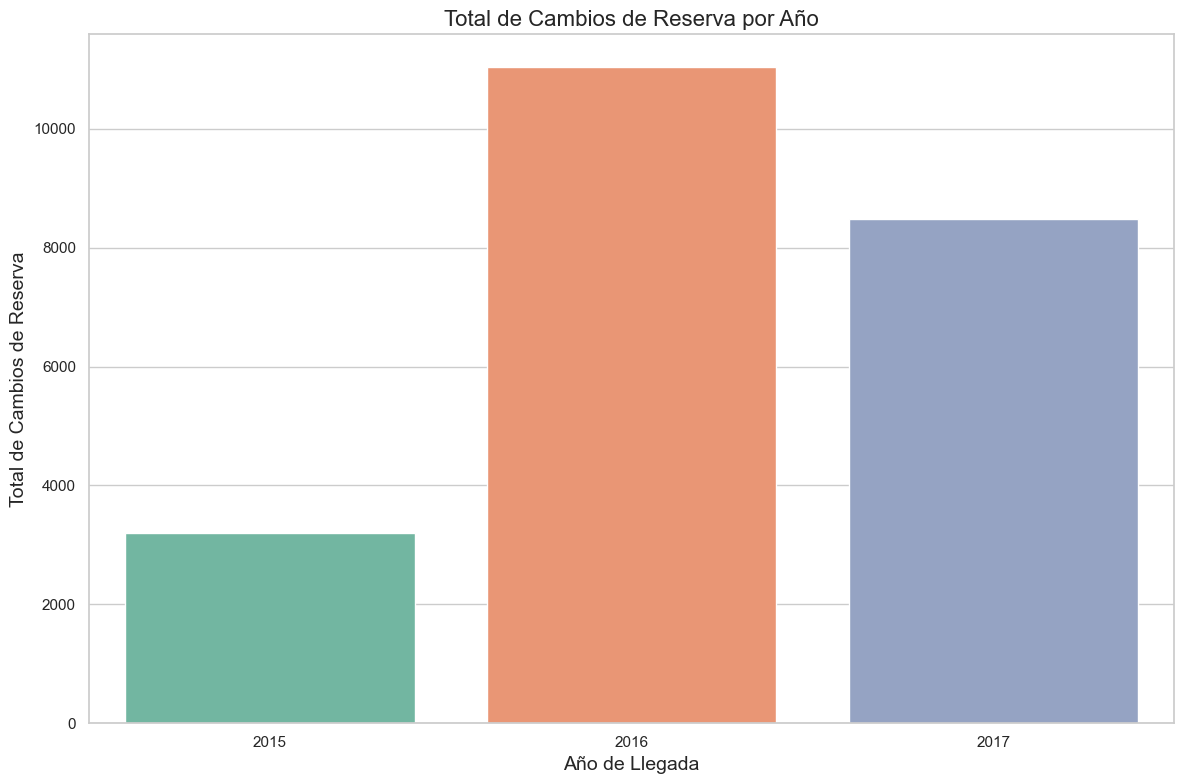

In [46]:
# Filtrar filas sin valores nulos en las columnas relevantes
df_year_changes = df[['arrival_date_year', 'booking_changes']].dropna()

# Contar el número de cambios de reserva por año
booking_changes_by_year = df_year_changes.groupby('arrival_date_year')['booking_changes'].sum().reset_index()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras para los cambios de reserva por año
sns.barplot(x='arrival_date_year', y='booking_changes', data=booking_changes_by_year, palette='Set2')

# Añadir títulos y etiquetas
plt.title('Total de Cambios de Reserva por Año', fontsize=16)
plt.xlabel('Año de Llegada', fontsize=14)
plt.ylabel('Total de Cambios de Reserva', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_12424\969269418.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='deposit_type', y='is_canceled', data=df_deposit_cancellation, palette='Set2')


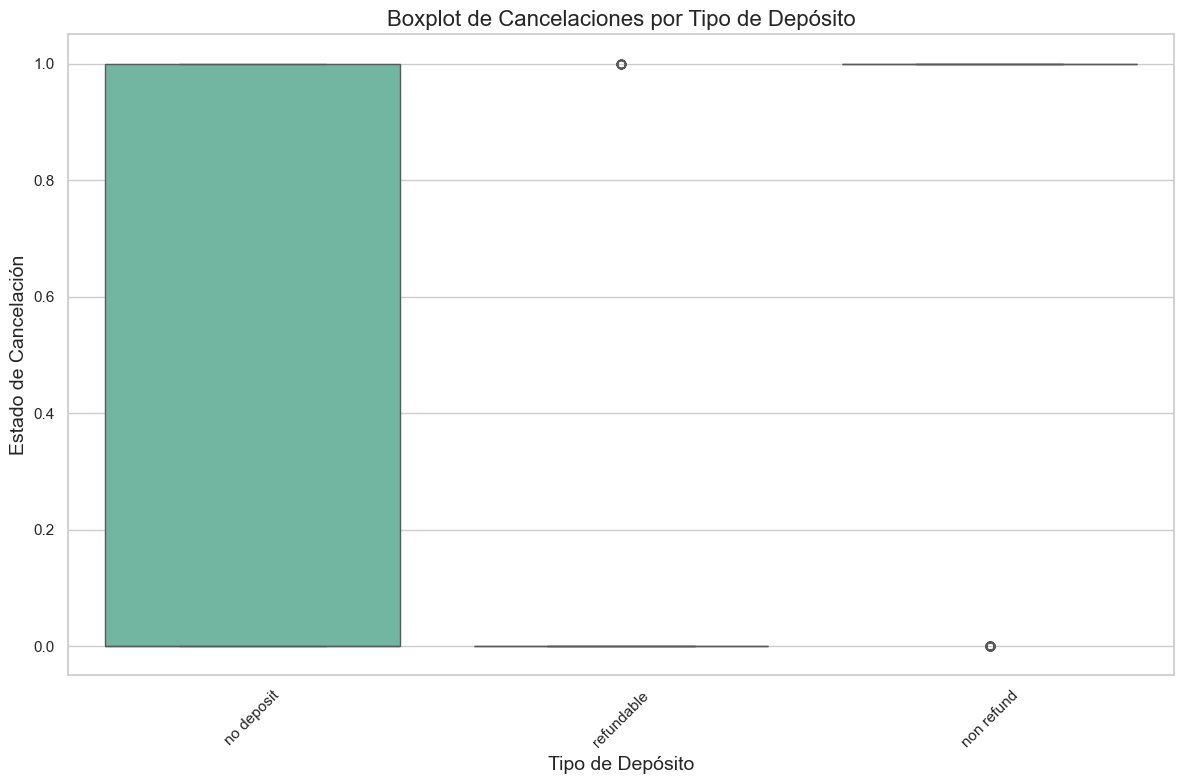

In [47]:
# Filtrar filas sin valores nulos en las columnas relevantes
df_deposit_cancellation = df[['deposit_type', 'is_canceled']].dropna()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el boxplot usando seaborn
sns.boxplot(x='deposit_type', y='is_canceled', data=df_deposit_cancellation, palette='Set2')

# Añadir títulos y etiquetas
plt.title('Boxplot de Cancelaciones por Tipo de Depósito', fontsize=16)
plt.xlabel('Tipo de Depósito', fontsize=14)
plt.ylabel('Estado de Cancelación', fontsize=14)

# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



**Diagrama de Dispersion**

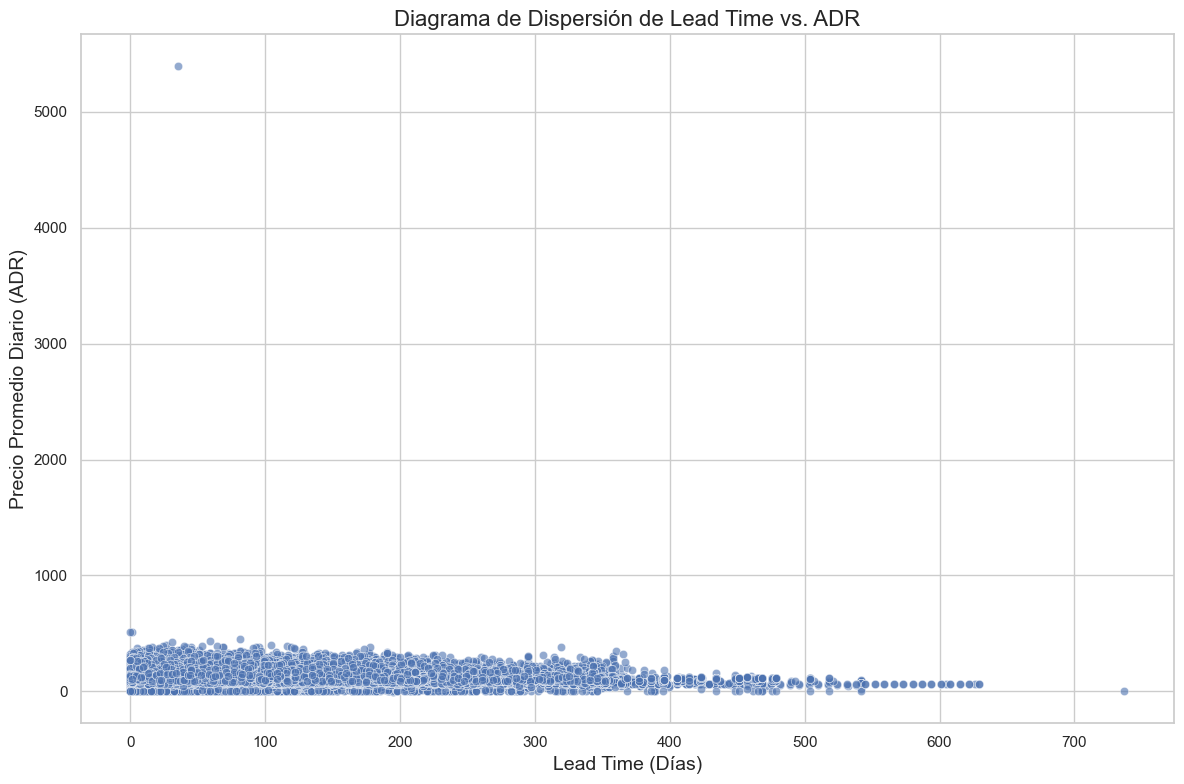

In [48]:
# Filtrar filas sin valores nulos en las columnas relevantes
df_scatter = df[['lead_time', 'adr']].dropna()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el diagrama de dispersión usando seaborn
sns.scatterplot(x='lead_time', y='adr', data=df_scatter, alpha=0.6)

# Añadir títulos y etiquetas
plt.title('Diagrama de Dispersión de Lead Time vs. ADR', fontsize=16)
plt.xlabel('Lead Time (Días)', fontsize=14)
plt.ylabel('Precio Promedio Diario (ADR)', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


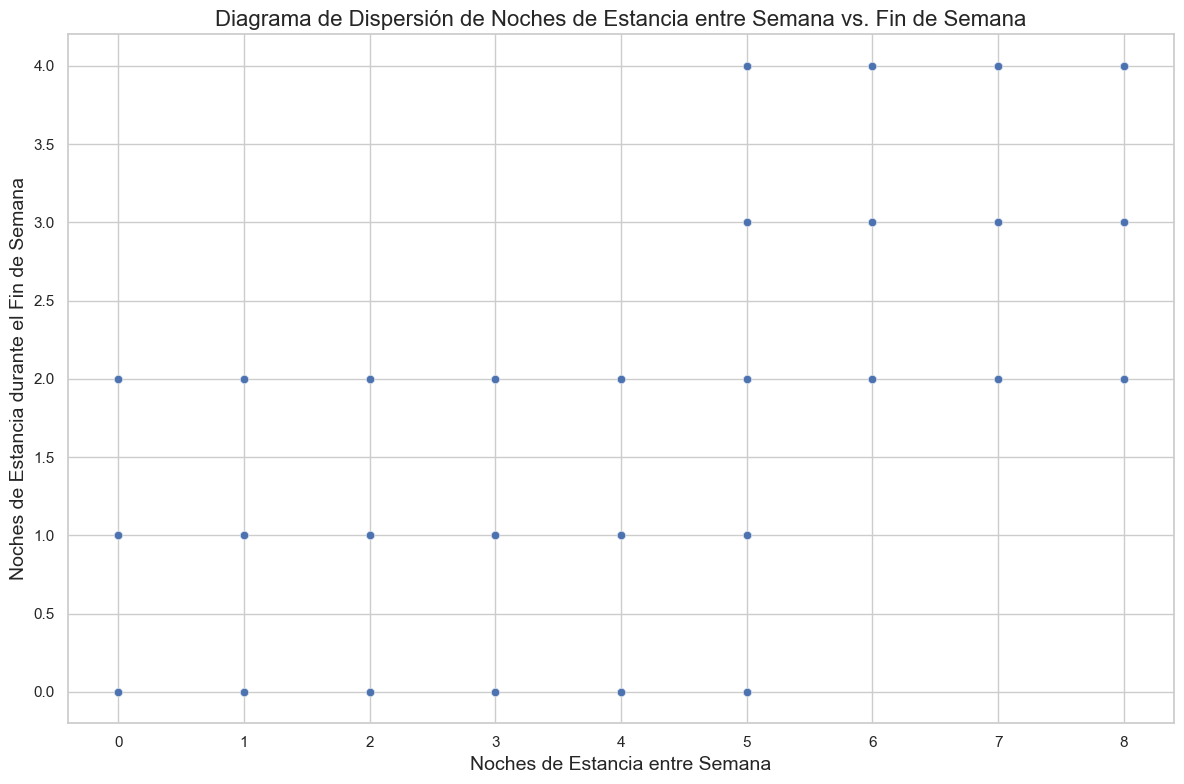

In [49]:
# Filtrar filas sin valores nulos en las columnas relevantes
df_scatter_week = df[['stays_in_week_nights', 'stays_in_weekend_nights']].dropna()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el diagrama de dispersión usando seaborn
sns.scatterplot(x='stays_in_week_nights', y='stays_in_weekend_nights', data=df_scatter_week, alpha=0.6)

# Añadir títulos y etiquetas
plt.title('Diagrama de Dispersión de Noches de Estancia entre Semana vs. Fin de Semana', fontsize=16)
plt.xlabel('Noches de Estancia entre Semana', fontsize=14)
plt.ylabel('Noches de Estancia durante el Fin de Semana', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## **Análisis adicional**

In [50]:
# Identificar columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nColumnas numéricas identificadas:")
print(columnas_numericas)


Columnas numéricas identificadas:
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


## Estadísticas descriptivas

In [51]:
def calcular_estadisticas(column, data):
    """
    Calcula estadísticas descriptivas para una columna numérica,
    omitiendo los valores nulos.

    Parámetros:
    - column (str): Nombre de la columna.
    - data (pd.Series): Serie de pandas con los datos de la columna.

    Retorna:
    - dict: Diccionario con las estadísticas calculadas.
    """
    estadisticas = {
        'Cuenta': int(np.sum(~np.isnan(data))),
        'Media': np.nanmean(data),
        'Mediana': np.nanmedian(data),
        'Desviación Estándar': np.nanstd(data, ddof=1),
        'Mínimo': np.nanmin(data),
        'Máximo': np.nanmax(data),
        '25% Percentil': np.nanpercentile(data, 25),
        '75% Percentil': np.nanpercentile(data, 75)
    }
    return estadisticas

# Crear un diccionario para almacenar las estadísticas
estadisticas_dict = {}
# Iterar sobre cada columna numérica y calcular las estadísticas
for columna in columnas_numericas:
    datos_columna = df[columna].values
    estadisticas = calcular_estadisticas(columna, datos_columna)
    estadisticas_dict[columna] = estadisticas
# Convertir el diccionario a un DataFrame para una mejor visualización
estadisticas_df = pd.DataFrame(estadisticas_dict).T  # Transponer para que las columnas sean las filas
estadisticas_df = estadisticas_df[['Cuenta', 'Media', 'Mediana', 'Desviación Estándar', 
                                   'Mínimo', 'Máximo', '25% Percentil', '75% Percentil']]
# Redondear las estadísticas a 2 decimales
estadisticas_df = estadisticas_df.round(2)
# Mostrar el DataFrame formateado
print("\nEstadísticas Descriptivas (Redondeadas a 2 decimales):")
estadisticas_df


Estadísticas Descriptivas (Redondeadas a 2 decimales):


Cuenta    Media  Mediana  \
is_canceled                     85424.0     0.27     0.00   
lead_time                       85424.0    78.64    48.00   
arrival_date_year               85424.0  2016.21  2016.00   
arrival_date_week_number        85424.0    26.83    27.00   
arrival_date_day_of_month       85424.0    15.85    16.00   
stays_in_weekend_nights         85424.0     0.95     1.00   
stays_in_week_nights            85424.0     2.47     2.00   
adults                          85424.0     1.88     2.00   
children                        85424.0     0.13     0.00   
babies                          85424.0     0.01     0.00   
is_repeated_guest               85424.0     0.04     0.00   
previous_cancellations          85424.0     0.03     0.00   
previous_bookings_not_canceled  85424.0     0.19     0.00   
booking_changes                 85424.0     0.27     0.00   
days_in_waiting_list            85424.0     0.76     0.00   
adr                             85424.0   106.72    98.89   
required_car_parking_spaces     85424.0     0.09     0.00   
total_of_special_requests       85424.0     0.70     0.00   

                                Desviación Estándar   Mínimo  Máximo  \
is_canceled                                    0.45     0.00     1.0   
lead_time                                     85.20     0.00   737.0   
arrival_date_year                              0.69  2015.00  2017.0   
arrival_date_week_number                      13.68     1.00    53.0   
arrival_date_day_of_month                      8.83     1.00    31.0   
stays_in_weekend_nights                        0.91     0.00     4.0   
stays_in_week_nights                           1.64     0.00     8.0   
adults                                         0.49     1.00     3.0   
children                                       0.45     0.00     3.0   
babies                                         0.11     0.00    10.0   
is_repeated_guest                              0.19     0.00     1.0   
previous_cancellations                         0.37     0.00    26.0   
previous_bookings_not_canceled                 1.75     0.00    72.0   
booking_changes                                0.70     0.00    18.0   
days_in_waiting_list                          10.10     0.00   391.0   
adr                                           54.89    -6.38  5400.0   
required_car_parking_spaces                    0.28     0.00     8.0   
total_of_special_requests                      0.83     0.00     5.0   

                                25% Percentil  75% Percentil  
is_canceled                              0.00           1.00  
lead_time                               11.00         122.25  
arrival_date_year                     2016.00        2017.00  
arrival_date_week_number                16.00          37.00  
arrival_date_day_of_month                8.00          24.00  
stays_in_weekend_nights                  0.00           2.00  
stays_in_week_nights                     1.00           3.00  
adults                                   2.00           2.00  
children                                 0.00           0.00  
babies                                   0.00           0.00  
is_repeated_guest                        0.00           0.00  
previous_cancellations                   0.00           0.00  
previous_bookings_not_canceled           0.00           0.00  
booking_changes                          0.00           0.00  
days_in_waiting_list                     0.00           0.00  
adr                                     72.25         134.30  
required_car_parking_spaces              0.00           0.00  
total_of_special_requests                0.00           1.00

In [52]:
import plotly.express as px

# Crear el diagrama de dispersión
fig = px.scatter(df, x='booking_changes', y='is_canceled', color='is_canceled',
                 title='Diagrama de Dispersión: Cambios en Reserva vs. Estado de Cancelación',
                 labels={'booking_changes': 'Cambios en Reserva', 'is_canceled': '¿Cancelada?'},
                 color_discrete_sequence=['blue', 'red'])

# Mostrar el gráfico
fig.show()


In [56]:
# Calcular la matriz de correlación utilizando Pearson
matriz_correlacion = df[columnas_numericas].corr(method='pearson')
# Mostrar la matriz de correlación
print("\nMatriz de Correlación (Pearson):")
matriz_correlacion


Matriz de Correlación (Pearson):


is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.189154           0.088614   
lead_time                          0.189154   1.000000           0.140341   
arrival_date_year                  0.088614   0.140341           1.000000   
arrival_date_week_number           0.003585   0.100718          -0.513940   
arrival_date_day_of_month          0.006761   0.011937          -0.010987   
stays_in_weekend_nights            0.056404   0.225883           0.008712   
stays_in_week_nights               0.086887   0.331609           0.008344   
adults                             0.093354   0.154308           0.063626   
children                           0.064743   0.026073           0.043019   
babies                            -0.021166  -0.002586          -0.023322   
is_repeated_guest                 -0.088957  -0.147282           0.023986   
previous_cancellations             0.050931   0.006167          -0.053745   
previous_bookings_not_canceled    -0.052203  -0.079310           0.027196   
booking_changes                   -0.091388   0.085769           0.011741   
days_in_waiting_list               0.004953   0.135711          -0.028256   
adr                                0.128235   0.026295           0.176355   
required_car_parking_spaces       -0.184723  -0.085841          -0.040273   
total_of_special_requests         -0.120489   0.032782           0.063446   

                                arrival_date_week_number  \
is_canceled                                     0.003585   
lead_time                                       0.100718   
arrival_date_year                              -0.513940   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.093293   
stays_in_weekend_nights                         0.037235   
stays_in_week_nights                            0.044314   
adults                                          0.023652   
children                                        0.013942   
babies                                          0.013568   
is_repeated_guest                              -0.038405   
previous_cancellations                          0.006796   
previous_bookings_not_canceled                 -0.021145   
booking_changes                                 0.011876   
days_in_waiting_list                            0.013666   
adr                                             0.099396   
required_car_parking_spaces                     0.008704   
total_of_special_requests                       0.046244   

                                arrival_date_day_of_month  \
is_canceled                                      0.006761   
lead_time                                        0.011937   
arrival_date_year                               -0.010987   
arrival_date_week_number                         0.093293   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.005093   
stays_in_week_nights                            -0.013857   
adults                                           0.004227   
children                                         0.015344   
babies                                          -0.000360   
is_repeated_guest                               -0.004519   
previous_cancellations                          -0.008746   
previous_bookings_not_canceled                   0.000049   
booking_changes                                  0.008853   
days_in_waiting_list                             0.005994   
adr                                              0.022114   
required_car_parking_spaces                      0.009157   
total_of_special_requests                       -0.003543   

                                stays_in_weekend_nights  stays_in_week_nights  \
is_canceled                                    0.056404              0.086887   
lead_time                                      0.225883              0.331609   
arrival_date_year       

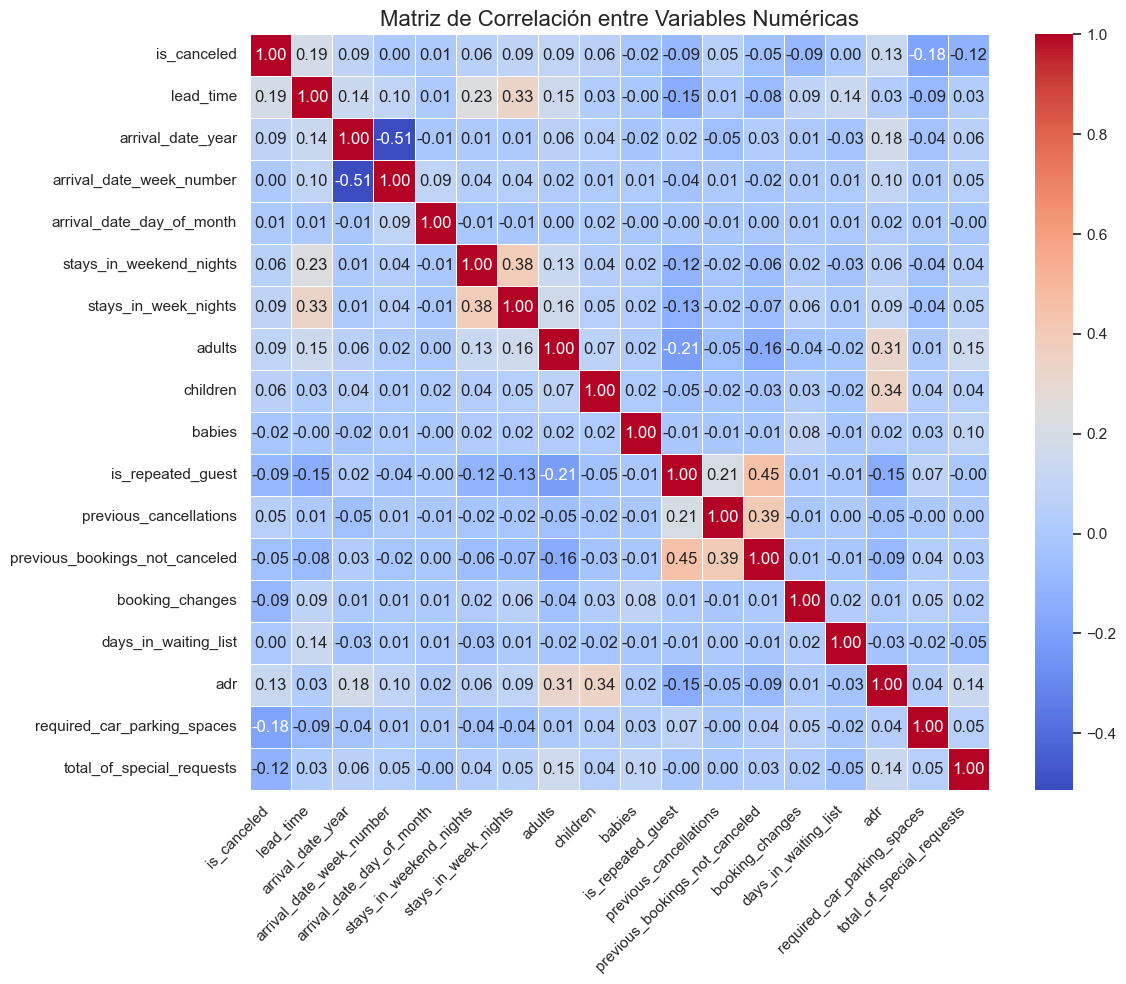

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Si hay valores nulos, puedes decidir eliminarlos o rellenarlos
df_numerico = df_numerico.dropna()  # Eliminar filas con valores nulos

# Calcular la matriz de correlación
matriz_correlacion = df_numerico.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear el heatmap utilizando seaborn
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Añadir títulos y etiquetas
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



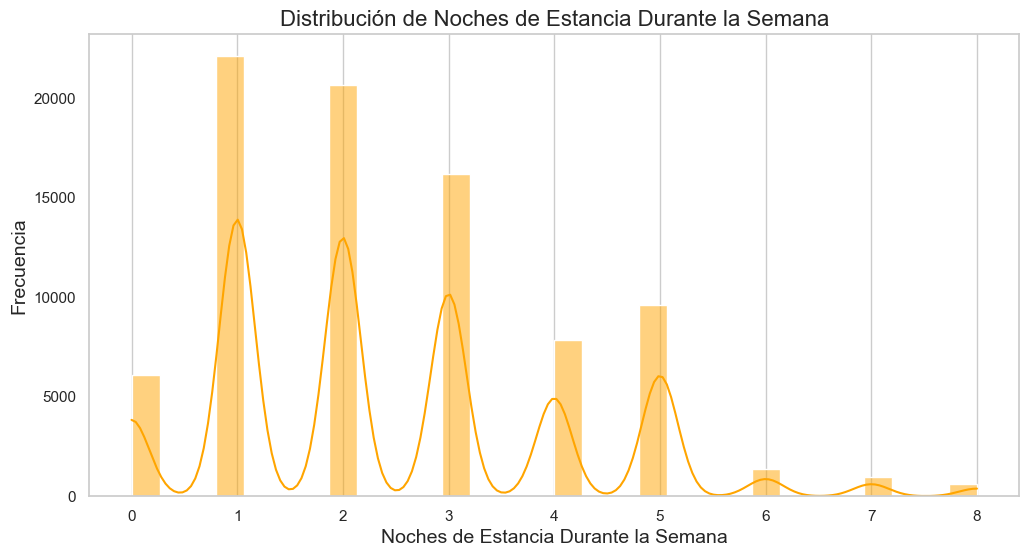

In [60]:
plt.figure(figsize=(12, 6))
sns.histplot(df['stays_in_week_nights'], bins=30, kde=True, color='orange')
plt.title('Distribución de Noches de Estancia Durante la Semana', fontsize=16)
plt.xlabel('Noches de Estancia Durante la Semana', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y')
plt.show()


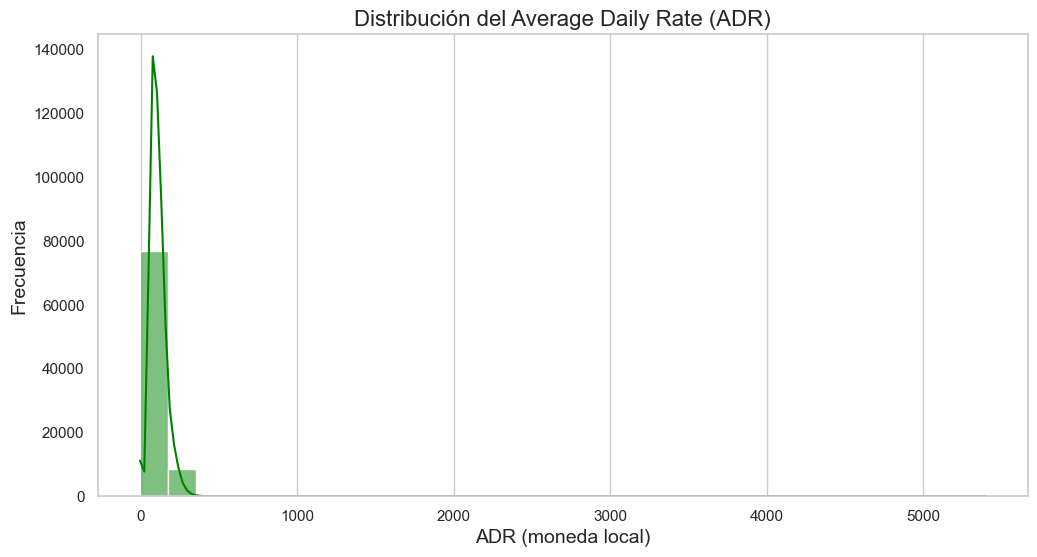

In [61]:
plt.figure(figsize=(12, 6))
sns.histplot(df['adr'], bins=30, kde=True, color='green')
plt.title('Distribución del Average Daily Rate (ADR)', fontsize=16)
plt.xlabel('ADR (moneda local)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y')
plt.show()
